In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
'''
figuring out what n should be for alias_freq function. Start with alias_freq_n function, but want to automatically specify n.

f_sample / 2 = abs(n f_sample - n - f_signal) = abs(n(f_sample - 1) - f_signal)

case 1: f_sample / 2 >= n f_sample - f_signal # assuming f_sample >=0.
n <= (f_sample / 2 + f_signal) / f_sample
n = np.floor((f_signal + f_sample / 2) / f_sample)
case 2: f_sample / 2 >= -(n f_sample - f_signal) = -n f_sample + f_signal # assuming f_sample >=0.
-n <= (f_sample / 2 - f_signal) / f_sample
n >= (f_signal - f_sample / 2) / f_sample
n = np.ceil((f_signal - f_sample / 2) / f_sample)
'''

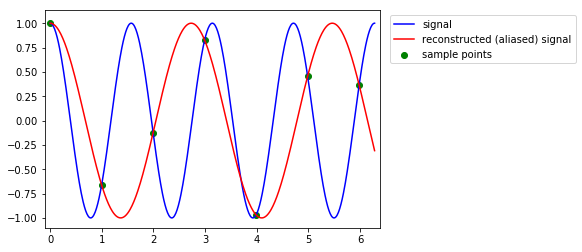

In [73]:
# functions alias_freq and f_perceived below should be equivalent. function alias_freq_n is a generalization:
# a specific choice of n (which varies, but how to choose which one is shown in the other two functions) results in the aliased
# frequency that is below f_Nyquist, i.e., the one that would be reconstructed given f_sample (and an infinitely long signal and
# sampling time.)

# Wikipedia - aliasing: the aliases of a frequency f sampled at f_s will be f_n = abs(f - n * f_s).
# so, sampled over all n, the function below gives an equivalence class for aliased frequencies.
def alias_freq_n(f_signal, f_sample, n):
    f_signal = float(f_signal); f_sample = float(f_sample); n = float(n)
    f_alias = np.abs(f_sample * n - f_signal)
    return f_alias

# same as above, but choose n st f_alias <= f_Nyquist = f_s / 2. So, this is what a signal would actually be aliased to.
def alias_freq(f_signal, f_sample):
    f_signal = float(f_signal); f_sample = float(f_sample);
    n_1 = np.floor((f_signal + f_sample / 2) / f_sample)
    n_2 = np.ceil((f_signal - f_sample / 2) / f_sample)
    # return [f_sample / 2, np.abs(f_sample * n_1 - f_signal), np.abs(f_sample * n_2 - f_signal)]
    # should be the same regardless to whether n_1 or n_2 is used for n.
    f_alias = np.abs(f_sample * n_1 - f_signal)
    # print([f_signal, f_sample, n_1, n_2, f_alias])
    return f_alias

# frequency of reconstructed signal given an original signal with frequency f_signal and a sampling rate f_sample.
def f_perceived(f_signal, f_sample):
    f_signal = float(f_signal)
    f_sample = float(f_sample)
    return np.abs(f_signal - f_sample * np.round(f_signal / f_sample))

f_signal = 4.0
f_sample = 6.3
f_alias = alias_freq(f_signal, f_sample) # this works
# f_alias = f_perceived(f_signal, f_sample) # this works
# f_alias = alias_freq_n(f_signal, f_sample, 2.0) # this works for chosen n. Can also use this one for effectively choosing an n.

# modelling behavior of infinitely long and infinitely sampled signal, but only showing a finite window of that signal.
start = 0.0 * np.pi
stop = 2.0 * np.pi
points = 512

t = np.linspace(start, stop, points)
t_sample = np.arange(start, stop + .000001, 2.0 * np.pi / f_sample) # + .000001 for a lazy endpoint=True

y_signal = np.cos(f_signal * t)
y_sample = np.cos(f_signal * t_sample)
extra_phase = -f_alias * start + np.arccos(y_sample[0]) # only needed when start time (variable start) is not 0.0.
y_alias = np.cos(f_alias * t + extra_phase)

# plot only shows t=[start stop], so for f_sample < (start - stop) / (2.0 * np.pi), will only show one sampling point,
# though it will show what the reconstructed signal would be if all sampling points are still there outside of visible window.
plt.plot(t, y_signal, color='blue')
plt.scatter(t_sample, y_sample, color='green')
plt.plot(t, y_alias, color='red')
plt.xlim([start - 0.1, stop + 0.1])
plt.legend(['signal', 'reconstructed (aliased) signal', 'sample points'], bbox_to_anchor=[1.6, 1.0])
plt.show()

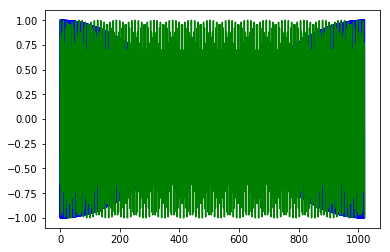

In [74]:
#print(np.ceil((stop - start) / (2.0 * np.pi / f_sample)))
# print(len(np.arange(start, 511 * (2.0 * np.pi / f_sample) + start + 0.000001, 2.0 * np.pi / f_sample)))
#np.arange(start, 200 * stop + .000001, 2.0 * np.pi / f_sample)
sample_step = 2.0 * np.pi / f_sample

# in demo defined below, t_signal_display would ideally be of infinite length,
# but instead just defining it to be twice as long as t_sample_display. Consequently,
# will see aliasing of the signal itself in plots below if f_sample < f_signal.
t_signal_display = np.linspace(start, (1024 - 1) * sample_step + start + 0.000001, 2048)
t_sample_display = np.arange(start, (1024 - 1) * sample_step + start + 0.000001, sample_step)

y_signal_display = np.cos(f_signal * t_display)
y_sample_display = np.cos(f_signal * t_sample_display)

plt.clf()
plt.plot(t_signal_display, y_signal_display, color='blue')
plt.plot(t_sample_display, y_sample_display, color='green')

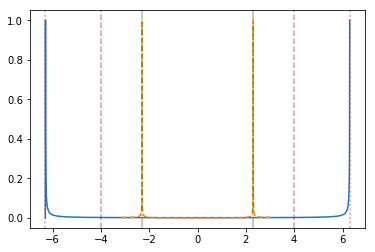

In [82]:
T_signal_display = 2 * np.pi * np.fft.fftfreq(len(t_signal_display), t_signal_display[1] - t_signal_display[0])
T_sample_display = 2 * np.pi * np.fft.fftfreq(len(t_sample_display), t_sample_display[1] - t_sample_display[0])

Y_signal_display = np.fft.fft(y_signal_display)
Y_signal_display = Y_signal_display[np.argsort(T_signal_display)]
Y_signal_display = Y_signal_display / np.max(np.abs(Y_signal_display))
Y_sample_display = np.fft.fft(y_sample_display)
Y_sample_display = Y_sample_display[np.argsort(T_sample_display)]
Y_sample_display = Y_sample_display / np.max(np.abs(Y_sample_display))

T_signal_display = np.sort(T_signal_display)
T_sample_display = np.sort(T_sample_display)

# predicted aliased frequency
# f_aliased = get_alias_freq(f_1, f_sample)
#f_aliased = f_perceived(f_1, f_sample)

# in plots, still will be minor offsets between sampled frequencies and actual frequencies, even if f_sample <= f_1 / 2.0.
# this is because the sampling is done only a finite number of times, not infinitely many, and because phase offsets may not be
# exactly where they would be if lucky to reconstruct full signal perfectly.
plt.clf()
plt.plot(T_signal_display, np.abs(Y_signal_display))
plt.plot(T_sample_display, np.abs(Y_sample_display), linestyle='--')
plt.axvline(x=f_signal, linestyle='--', color='purple', alpha=0.4)
plt.axvline(x=-f_signal, linestyle='--', color='purple', alpha=0.4)
plt.axvline(x=f_sample, linestyle=':', color='red', alpha=0.4)
plt.axvline(x=-f_sample, linestyle=':', color='red', alpha=0.4)
plt.axvline(x=f_alias, linestyle='-.', color='green', alpha=0.4)
plt.axvline(x=-f_alias, linestyle='-.', color='green', alpha=0.4)
plt.xlim([-(np.max([f_signal, f_sample]) * 1.1), (np.max([f_signal, f_sample]) * 1.1)])
plt.show()